In [ ]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import random
from math import pi


In [ ]:
#audio_songs=  pd.read_csv('https://drive.google.com/file/d/1p6aojx4wrpsdzFsDFv6nsHNm_-vfSME9/view?usp=share_link') #5000_songs_audio (i can use only this line of code and skip other 2 line of code)
url='https://drive.google.com/file/d/1p6aojx4wrpsdzFsDFv6nsHNm_-vfSME9/view?usp=share_link' #5000_songs_audio
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
songs = pd.read_csv(path)

In [ ]:
from sklearn import set_config
set_config(transform_output="pandas")   #.set_output(transform="pandas") i can skip this line of code with  this 2 line of code

In [ ]:
songs.head(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                            

In [ ]:
print(songs.columns) # it looks like there is too much space

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [ ]:
# Remove spaces from column names
songs.columns = songs.columns.str.replace(' ', '')
songs.head(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [ ]:
#dropping useless column
songs.drop(['id','html'],axis=1,inplace=True)

In [ ]:
# setting index
songs.set_index(['name','artist'],inplace=True)

In [ ]:
songs.head(5)  # checking whether index is set and dropped the column # dataframe looks good

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4


In [ ]:
songs.drop(['type'],axis=1,inplace=True) # bcoz the type column is empty i have to drop it, i am getting error in next step

# **Computing distances OR Data Scaling**

In [ ]:
my_scaler = MinMaxScaler().set_output(transform="pandas") #after tranfrorm we will get dataframe & just intialize minmax scaler

my_scaler.fit(songs) # fitting phase alorithm is running ur data(min & max of each column)

MinMaxScaler()

In [ ]:
songs_scaler = MinMaxScaler().set_output(transform='pandas') # in next 2 steps we are fitting our songs data in min max scaler

In [ ]:
songs_scaler.fit(songs)

MinMaxScaler()

In [ ]:
songs_scaled = songs_scaler.transform(songs) # here i am tranforing the sclaed data to new dataframe songs_scaled

In [ ]:
songs_scaled # checking all rows and columns & data is already changed inform 0 & 1

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Mulher Eu Sei,Chico César,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Rosa Morena,Kurt Elling,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6


# ***Euclidean distances ***

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
songs_dist = pd.DataFrame(pairwise_distances(songs_scaled), #Calculate Euclidian Distances to compare clusters
                    index=songs_scaled.index,
                    columns=songs_scaled.index)
songs_dist.head(5)

,name,Se Eu Quiser Falar Com Deus,Saudade De Bahia,"Canta Canta, Minha Gente",Mulher Eu Sei,Rosa Morena,Desafinado,Madalena,O Meu Amor É Glòria,Brigas Nunca Mais,Previsao,...,"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...","Pines Of Rome, P. 141: 3. The Pines Of The Janiculum","Don Giovanni, K.527: Overture","Music for Strings, Percussion and Celesta, BB 114: II. Allegro",A Flock Descends Into The Pentagonal Garden,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49","Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique","Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)","Serenade For Strings In E, Op.22, B. 52: 1. Moderato","Ravel: Boléro, M. 81"
,artist,Gilberto Gil,Antônio Carlos Jobim,Martinho Da Vila,Chico César,Kurt Elling,Stan Getz,Maria Gasolina,Sílvia Pérez Cruz,Paula Morelenbaum,Bossacucanova,...,Karol Szymanowski,Ottorino Respighi,Wolfgang Amadeus Mozart,Béla Bartók,Toru Takemitsu,Pyotr Ilyich Tchaikovsky,Tristan Murail,Arnold Schoenberg,Antonín Dvořák,Maurice Ravel
name,artist,,,,,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.000000,1.691234,1.789295e+00,1.377812,1.442124e+00,1.574117,1.082512,1.396036,1.440599,1.763709,...,1.500177,1.888451,1.825396,1.375091,1.521766,1.821519,1.631119,1.931411,1.731210,1.529595
Saudade De Bahia,Antônio Carlos Jobim,1.691234,0.000000,6.025589e-01,0.850116,9.021008e-01,0.884168,1.572105,1.070503,0.800979,0.767293,...,1.173265,1.554014,1.241961,1.861452,1.788592,1.400739,1.298251,1.834972,1.358767,1.163194
"Canta Canta, Minha Gente",Martinho Da Vila,1.789295,0.602559,4.214685e-08,1.022168,1.084682e+00,1.077646,1.602788,0.841850,0.954017,0.696109,...,1.420101,1.755208,1.414682,1.984332,1.949291,1.601395,1.518890,2.009627,1.578557,1.373982
Mulher Eu Sei,Chico César,1.377812,0.850116,1.022168e+00,0.000000,3.808181e-01,0.474649,1.314011,0.996884,0.975533,1.008997,...,0.924683,1.230588,1.034616,1.601424,1.521450,1.085913,0.951404,1.484489,0.991801,0.780276
Rosa Morena,Kurt Elling,1.442124,0.902101,1.084682e+00,0.380818,4.214685e-08,0.386737,1.225970,1.100979,0.851929,1.018555,...,0.755458,1.132246,1.000967,1.473302,1.446238,0.999850,0.784697,1.344057,0.895866,0.755666


# **K-Means**

In [ ]:
#Clustering
# 1. import the model
from sklearn.cluster import KMeans

In [ ]:
songs_norm = MinMaxScaler().set_output(transform='pandas').fit_transform(songs)

In [ ]:
# 2. initialize the model
songs_kmeans = KMeans(n_clusters=8,random_state=2323)

In [ ]:
# 3. fit the model to the data
results=songs_kmeans.fit(songs_scaled) # pass your scaled data here

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# 4. predict the cluster with Kmeans & obtain the cluster output
clusters = songs_kmeans.predict(songs_scaled) # pass your scaled data here

In [ ]:
# 5. attach the cluster output to our original DataFrame
songs_scaled["cluster"] = clusters

In [ ]:
songs_kmeans.labels_

array([0, 2, 2, ..., 5, 5, 5], dtype=int32)

In [ ]:
songs_kmeans.inertia_

1507.5907379156506

In [ ]:
songs_kmeans.feature_names_in_

array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'], dtype=object)

In [ ]:
clustered=songs_scaled.groupby('cluster').mean()

In [ ]:
clustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.661384,0.729309,0.547387,0.874932,0.0,0.103303,0.174882,0.019004,0.199278,0.563670,0.566443,0.052087,0.793537
1,0.291996,0.901132,0.416450,0.846176,1.0,0.112536,0.012156,0.762730,0.207981,0.247375,0.570067,0.059036,0.775238
2,0.632208,0.751888,0.152063,0.868455,1.0,0.094044,0.145074,0.028086,0.181337,0.602293,0.569391,0.051230,0.793624
3,0.529527,0.352213,0.459180,0.777761,1.0,0.057338,0.769687,0.034400,0.182186,0.472452,0.530653,0.052254,0.770588
4,0.340176,0.888810,0.575934,0.848639,0.0,0.109792,0.020244,0.738450,0.200009,0.262348,0.574905,0.062036,0.772012
5,0.331551,0.134869,0.429839,0.620657,1.0,0.049768,0.938196,0.860876,0.138769,0.173816,0.501496,0.082966,0.730343
6,0.604240,0.757226,0.744214,0.870939,1.0,0.098611,0.128579,0.032741,0.199844,0.539890,0.566446,0.052150,0.794150
7,0.394916,0.162097,0.510238,0.653076,0.0,0.050078,0.903608,0.633785,0.145712,0.231172,0.488212,0.070773,0.751952


In [ ]:
centroids = songs_kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids) # here i am actually assigning the centroids

# **Heatmap for centroids**

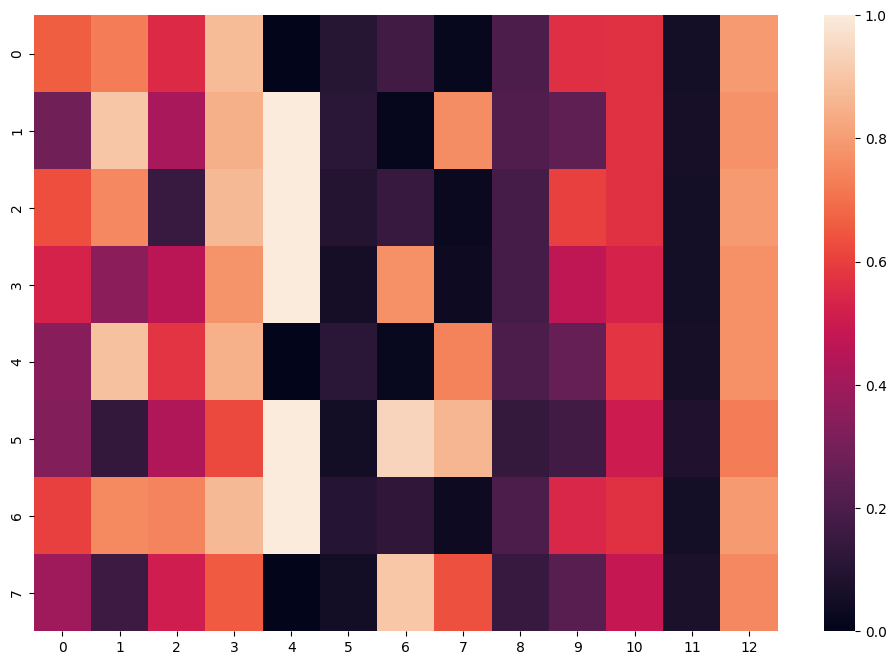

In [ ]:
#heatmap for clustered_centroids
plt.subplots(figsize=(12, 8))
heatmap = sns.heatmap(centroids)


Do i really need inertia,silhouette and

# **Inertia**

**Determination of clusters with Inertia and Silhoutte**

The inertia is the mean squared distance between each instance and its closest centroid. It is a simple process: if we had 10 observations divided into 2 clusters, we would first compute the euclidean distance between each observation and the cluster it belongs to, then square these distances and compute the mean:

In [ ]:
songs_norm = MinMaxScaler().set_output(transform='pandas').fit_transform(songs)

In [ ]:
inertia_list = []

for i in range(1,30):
    myKMeans = KMeans(n_clusters=i,n_init='auto')  # getting error so added from hana's noebook line of code n_init=auto
    myKMeans.fit(songs_norm)
    inertia_list.append(round(myKMeans.inertia_))    # code from lms

In [ ]:
inertia_list # looking into inertia list

[4619,
 3406,
 3038,
 2233,
 2036,
 1918,
 1662,
 1583,
 1455,
 1325,
 1319,
 1222,
 1197,
 1166,
 1071,
 1064,
 1016,
 1008,
 992,
 973,
 933,
 929,
 916,
 894,
 883,
 865,
 866,
 860,
 833]

plotting inertia code taken from lms need to change range,parameters like y -axis name

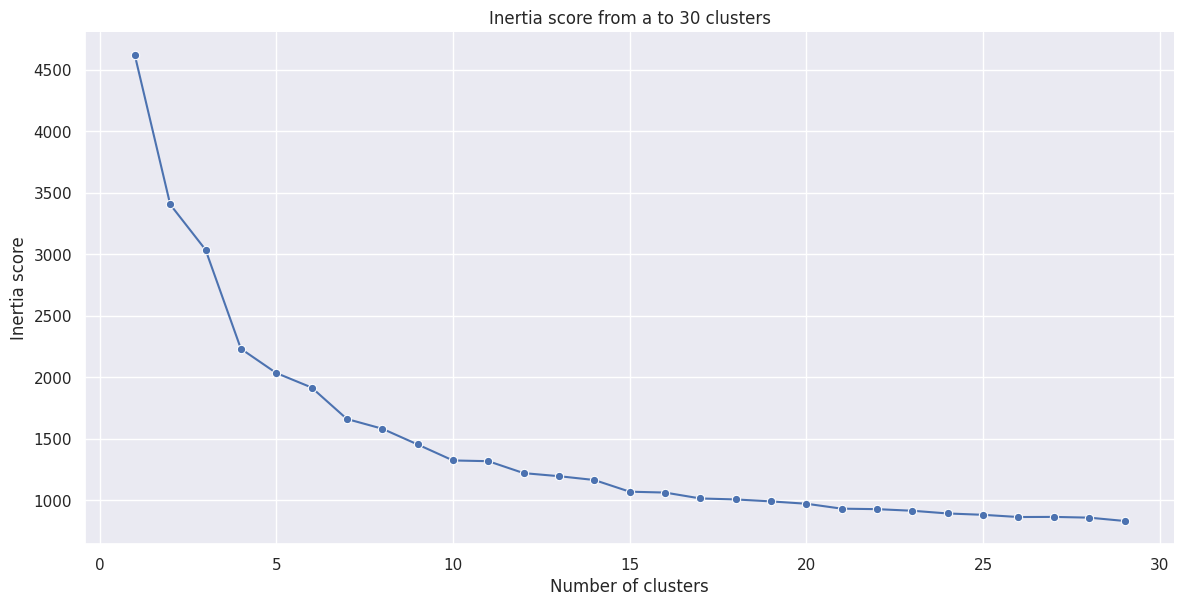

In [ ]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(1,30),y=inertia_list,marker='o',height=6,aspect=2)
    .set(title=f"Inertia score from a to 30 clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
)

# **Silhouette**

For every observation in a clustering algorithm, we can look at these two metrics:

a is the mean distance to the other instances in the same cluster
b is the mean distance to the instances of the next closest cluster
With these two values, we can compute the silhouette coefficient for each and every observation of the dataset as (b-a) / max(a, b). If we go back to our simple example, this is how we would compute the silhouette coefficient for one single observation:

In [ ]:
from sklearn.metrics import silhouette_score

#silhouette_score(my_scaler,Cluster)

In [ ]:
silhouette_list = []     #making for loop to iterrate the values

for i in range(2, 30):
    myKMeans = KMeans(n_clusters=i, n_init=10)
    myKMeans.fit(songs_norm)
    labels = myKMeans.predict(songs_norm)
    score = silhouette_score(songs_norm, labels)
    silhouette_list.append(score)

Plotting Silhouette

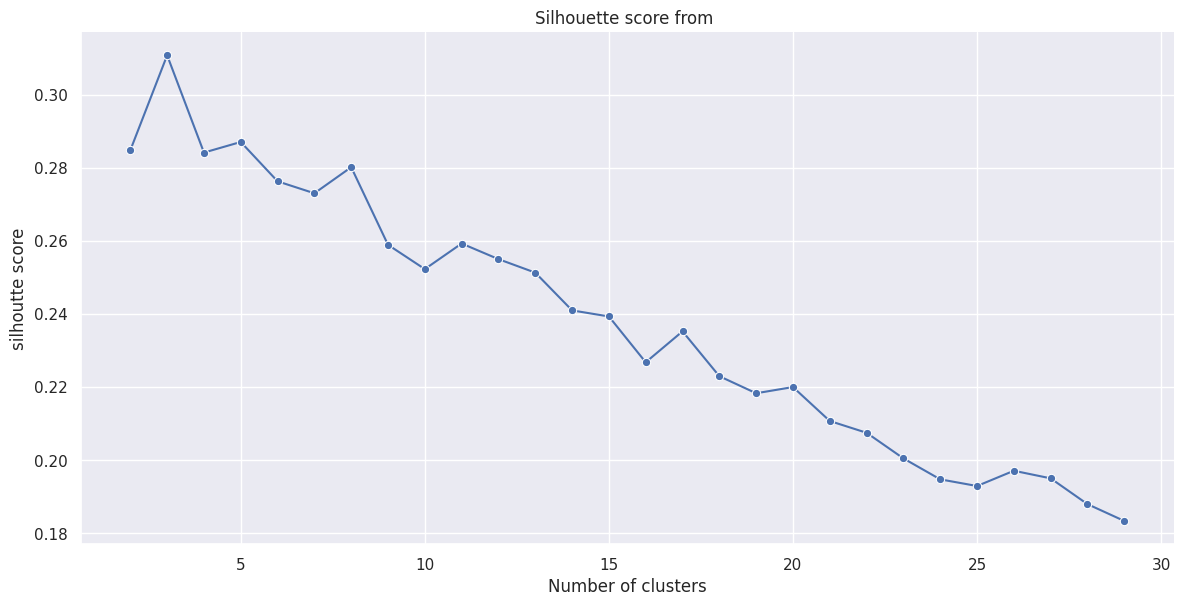

In [ ]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind ='line',x=range(2,30),y=silhouette_list,marker='o',height=6,aspect=2)
     .set(title=f'Silhouette score from ')
      .set_axis_labels('Number of clusters','silhoutte score')
);

# **Graph with 3d view Making radar plot**

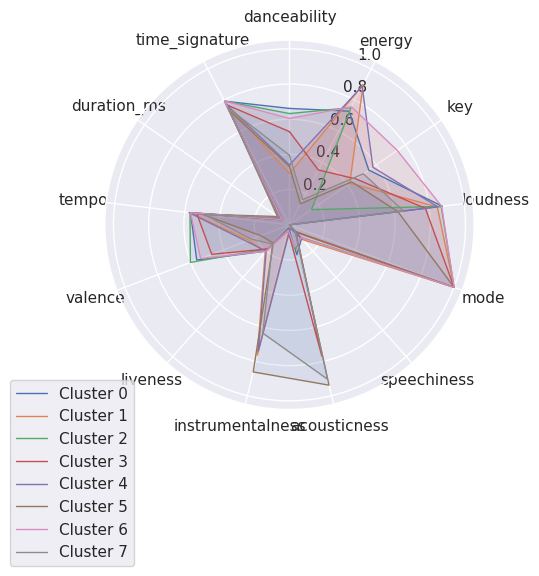

In [ ]:
radar_df = clustered.reset_index().rename(columns={'index':'Cluster'})

# ------- PART 1: Create background

# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind5
values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind6
values=radar_df.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 5")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind7
values=radar_df.loc[6].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 6")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind8
values=radar_df.loc[7].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 7")
ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


# Show the graph
plt.show()

# **Reducing dimensionality with PCA**

In [ ]:
# first we need to remove the column 'cluster' and store it for later
cluster = songs_scaled.pop('cluster')

In [ ]:
#Import and use PCA on the 7_feature_datase
from sklearn.decomposition import PCA

# initialize PCA and fit the data
pca = PCA(n_components=10)
pca.fit(songs_scaled)



PCA(n_components=10)

In [ ]:
from sklearn import set_config
set_config(transform_output="pandas")

In [ ]:
# transform the data
songs_scaled_pca = pca.transform(songs_norm)
songs_scaled_pca             # if i don't put above line of code i will get array

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
name,artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.094419,0.757884,-0.504083,0.438636,-0.257086,0.554242,0.560851,0.197453,0.102738,-0.022729
Saudade De Bahia,Antônio Carlos Jobim,-0.017481,-0.453019,-0.384560,-0.225555,0.082847,-0.174383,0.038690,0.109702,0.174917,-0.011962
"Canta Canta, Minha Gente",Martinho Da Vila,-0.126719,-0.504107,-0.471724,-0.230476,0.276667,-0.007994,0.037417,-0.139534,-0.165436,0.016899
Mulher Eu Sei,Chico César,0.505367,-0.184282,-0.811681,-0.006984,-0.074671,0.106656,0.223721,0.101924,0.086820,-0.029381
Rosa Morena,Kurt Elling,0.542908,-0.131782,-0.744387,0.172948,-0.151485,-0.082936,0.009560,0.093759,-0.027305,-0.032008
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.177483,0.113871,-0.123871,-0.106151,-0.116104,-0.081500,0.002337,-0.068789,0.079293,-0.077375
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.974406,0.069205,-0.211216,0.173331,-0.305723,-0.099305,-0.023697,-0.105861,0.101755,-0.077026
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.400419,0.327087,0.021031,0.424738,0.000413,-0.089724,-0.013262,-0.144308,0.239323,0.108310


In [ ]:
# adds cluster to pca_features
songs_scaled_pca['cluster'] = cluster

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(songs_scaled_pca, hue='cluster', kind="scatter", corner=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sum(pca.explained_variance_ratio_)

0.9901136216845948

# **New ....**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(songs_scaled)
evr = pca.explained_variance_ratio_
print(evr)

[0.27948434 0.26165474 0.18337196 0.11435786 0.06083028 0.0276579
 0.0226709  0.01778696 0.01492237 0.0073763  0.00603544 0.00251644
 0.00133449]


Second way to do the PCA, would be to specify not the number of features you want to have, but to specify how much variance you want these features to cover.

In [ ]:
# initialize PCA for covering 95% of variance
pca = PCA(n_components=0.95)

# fit and transform
data_songs_pca = pca.fit_transform(songs_norm)

In [ ]:
# add information on cluster
data_songs_pca['cluster'] = clusters

In [ ]:
pca.explained_variance_ratio_

array([0.27948434, 0.26165474, 0.18337196, 0.11435786, 0.06083028,
       0.0276579 , 0.0226709 ])

In [ ]:
sum(pca.explained_variance_ratio_)

0.950027986200692